In [269]:
import pandas as pd
import joblib
import numpy as np 
from tabulate import tabulate
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [270]:
warnings.filterwarnings("ignore")

In [271]:
df = pd.read_csv('usedCars.csv')
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤═══════════════╤════════════════════╤══════════════════╤════════════╤══════════╤═════════════╤═════════════╤════════════════════╤═══════════════════╤═════════════╤══════════╤════════════╤═══════════╤═══════════════╤═══════════════════════════════╤═══════════╤════════════╤════════════════╕
│    │     Id │ Company       │ Model              │ Variant          │ FuelType   │ Colour   │   Kilometer │ BodyStyle   │ TransmissionType   │ ManufactureDate   │   ModelYear │   CngKit │ Price      │ Owner     │ DealerState   │ DealerName                    │ City      │   Warranty │   QualityScore │
╞════╪════════╪═══════════════╪════════════════════╪══════════════════╪════════════╪══════════╪═════════════╪═════════════╪════════════════════╪═══════════════════╪═════════════╪══════════╪════════════╪═══════════╪═══════════════╪═══════════════════════════════╪═══════════╪════════════╪════════════════╡
│  0 │ 555675 │ MARUTI SUZUKI │ CELERIO(2017-2019) │ 1.0 ZXI AMT O    │ PETROL     │ 

In [272]:
print(df.shape)

(1064, 19)


In [273]:
print("DATA TYPE OF EACH COLUMN:")
print(df.dtypes)

DATA TYPE OF EACH COLUMN:
Id                    int64
Company              object
Model                object
Variant              object
FuelType             object
Colour               object
Kilometer             int64
BodyStyle            object
TransmissionType     object
ManufactureDate      object
ModelYear             int64
CngKit               object
Price                object
Owner                object
DealerState          object
DealerName           object
City                 object
Warranty              int64
QualityScore        float64
dtype: object


## Data Preprocessing

In [274]:
df.drop('Id',axis=1,inplace=True)

In [275]:
def remove_lakhs(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(remove_lakhs)

In [276]:
print("CHECKING FOR NULL VALUES:")
print(df.isnull().sum())

CHECKING FOR NULL VALUES:
Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64


In [277]:
df.drop('CngKit', axis=1, inplace=True)

In [278]:
df.drop('TransmissionType', axis=1, inplace=True)

In [279]:
df.dropna(subset=['FuelType'], inplace=True)

In [280]:
print("CHECKING FOR NULL VALUES:")
print(df.isnull().sum())

CHECKING FOR NULL VALUES:
Company            0
Model              0
Variant            0
FuelType           0
Colour             0
Kilometer          0
BodyStyle          0
ManufactureDate    0
ModelYear          0
Price              0
Owner              0
DealerState        0
DealerName         0
City               0
Warranty           0
QualityScore       0
dtype: int64


In [281]:
df.drop('ManufactureDate', axis = 1, inplace=True)

In [282]:
df.drop('Variant', axis = 1, inplace=True)

In [283]:
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [284]:
for i in df.columns:
    print(i,df[i].nunique())

Company 23
Model 218
FuelType 5
Colour 76
Kilometer 1005
BodyStyle 10
Age 17
Price 362
Owner 4
DealerState 10
DealerName 57
City 11
Warranty 2
QualityScore 43


In [285]:
df.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000
mean,52835.253057,6.138288,8.348542e+05,0.738476,7.770085
std,33843.834922,2.996651,5.728864e+05,0.439672,0.720044
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32171.000000,4.000000,4.850000e+05,0.000000,7.500000
50%,49451.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68879.000000,8.000000,9.825000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


## EDA

Text(0.5, 1.0, 'NUMBER OF CARS BY COMPANY')

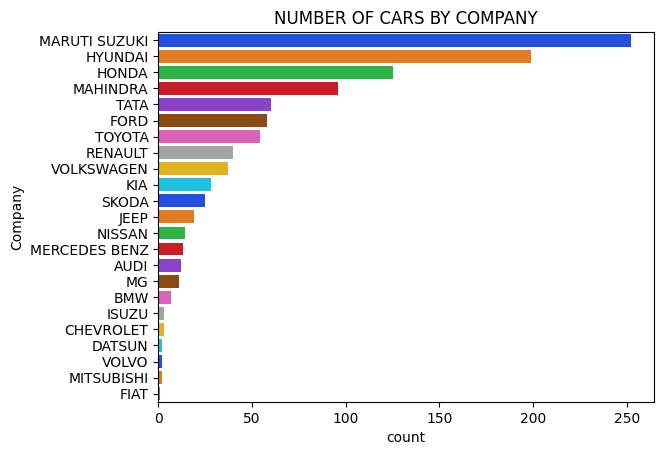

In [286]:
sns.countplot(df['Company'],order=df['Company'].value_counts().index, palette = 'bright').set_title('NUMBER OF CARS BY COMPANY')

Text(0.5, 1.0, 'TOP 10 CAR MODELS')

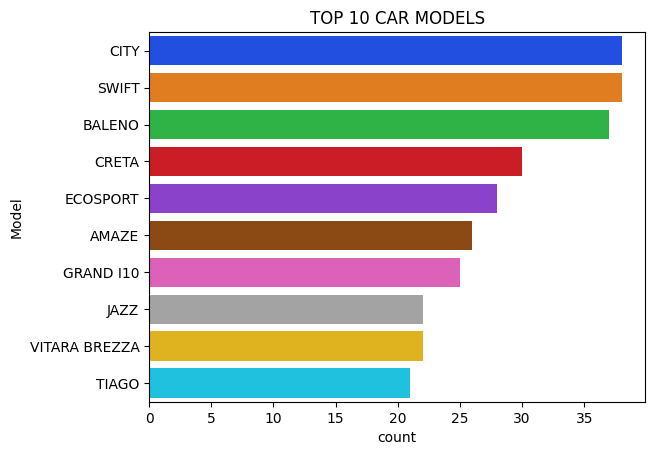

In [287]:
sns.countplot(df['Model'],order=df['Model'].value_counts().iloc[:10].index, palette = 'bright').set_title('TOP 10 CAR MODELS')

Text(0.5, 1.0, 'NUMBER OF CARS BY FUEL TYPE')

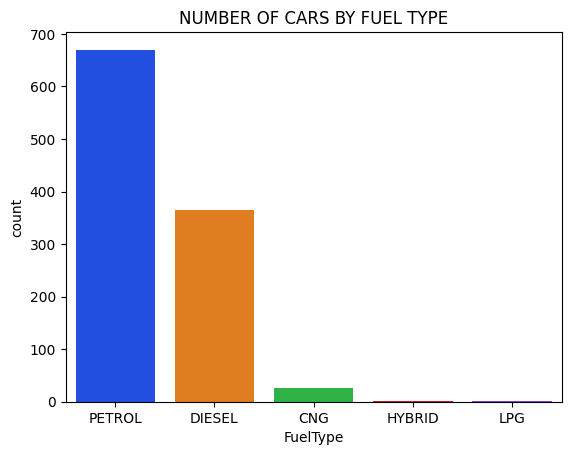

In [288]:
sns.countplot(x = 'FuelType', data = df, palette = 'bright').set_title('NUMBER OF CARS BY FUEL TYPE')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Red'),
  Text(4, 0, 'Black'),
  Text(5, 0, 'Brown'),
  Text(6, 0, 'Blue'),
  Text(7, 0, 'A Blue'),
  Text(8, 0, 'Pearl White'),
  Text(9, 0, 'Orange')])

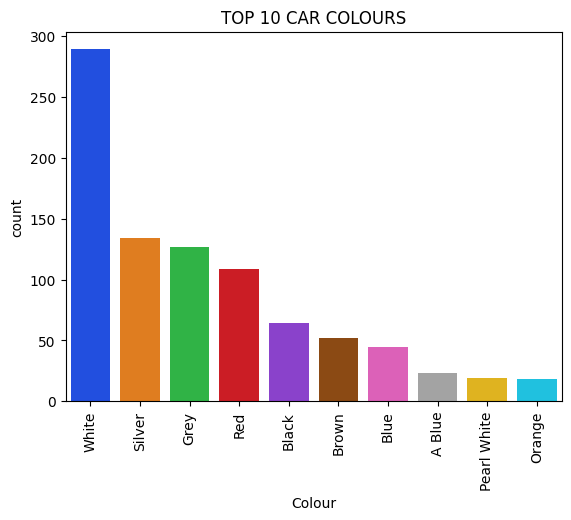

In [289]:
sns.countplot(x = 'Colour', data = df, palette = 'bright', order = df['Colour'].value_counts().iloc[:10].index).set_title('TOP 10 CAR COLOURS')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'ODOMETER READING')

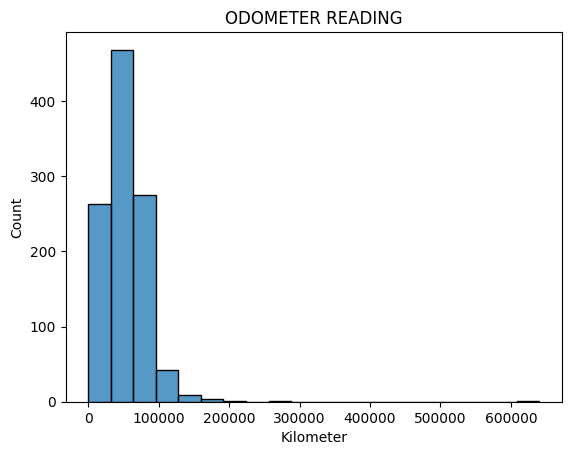

In [290]:
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('ODOMETER READING')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

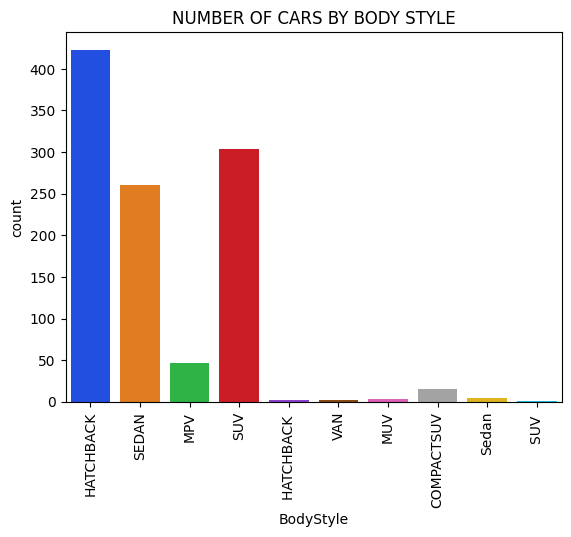

In [291]:
sns.countplot(x = 'BodyStyle', data = df, palette='bright').set_title('NUMBER OF CARS BY BODY STYLE')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'CAR AGE DISTRIBUTION')

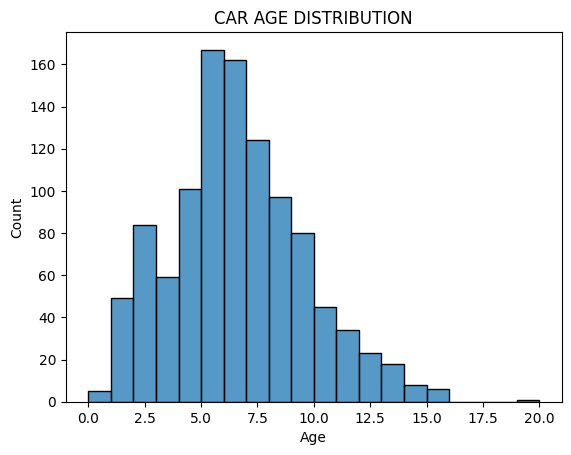

In [292]:
sns.histplot(x = 'Age', data = df, bins = 20).set_title('CAR AGE DISTRIBUTION')

Text(0.5, 1.0, 'CAR PRICE DISTRIBUTION')

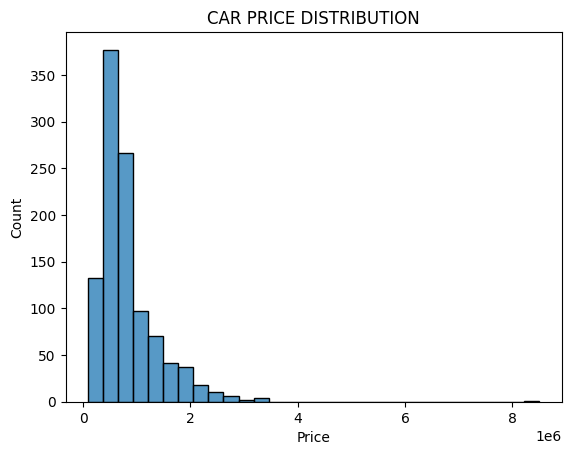

In [293]:
sns.histplot(x = 'Price', data =df, bins = 30).set_title('CAR PRICE DISTRIBUTION')

[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'OM Motors'),
 Text(7, 0, 'Car Estate'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

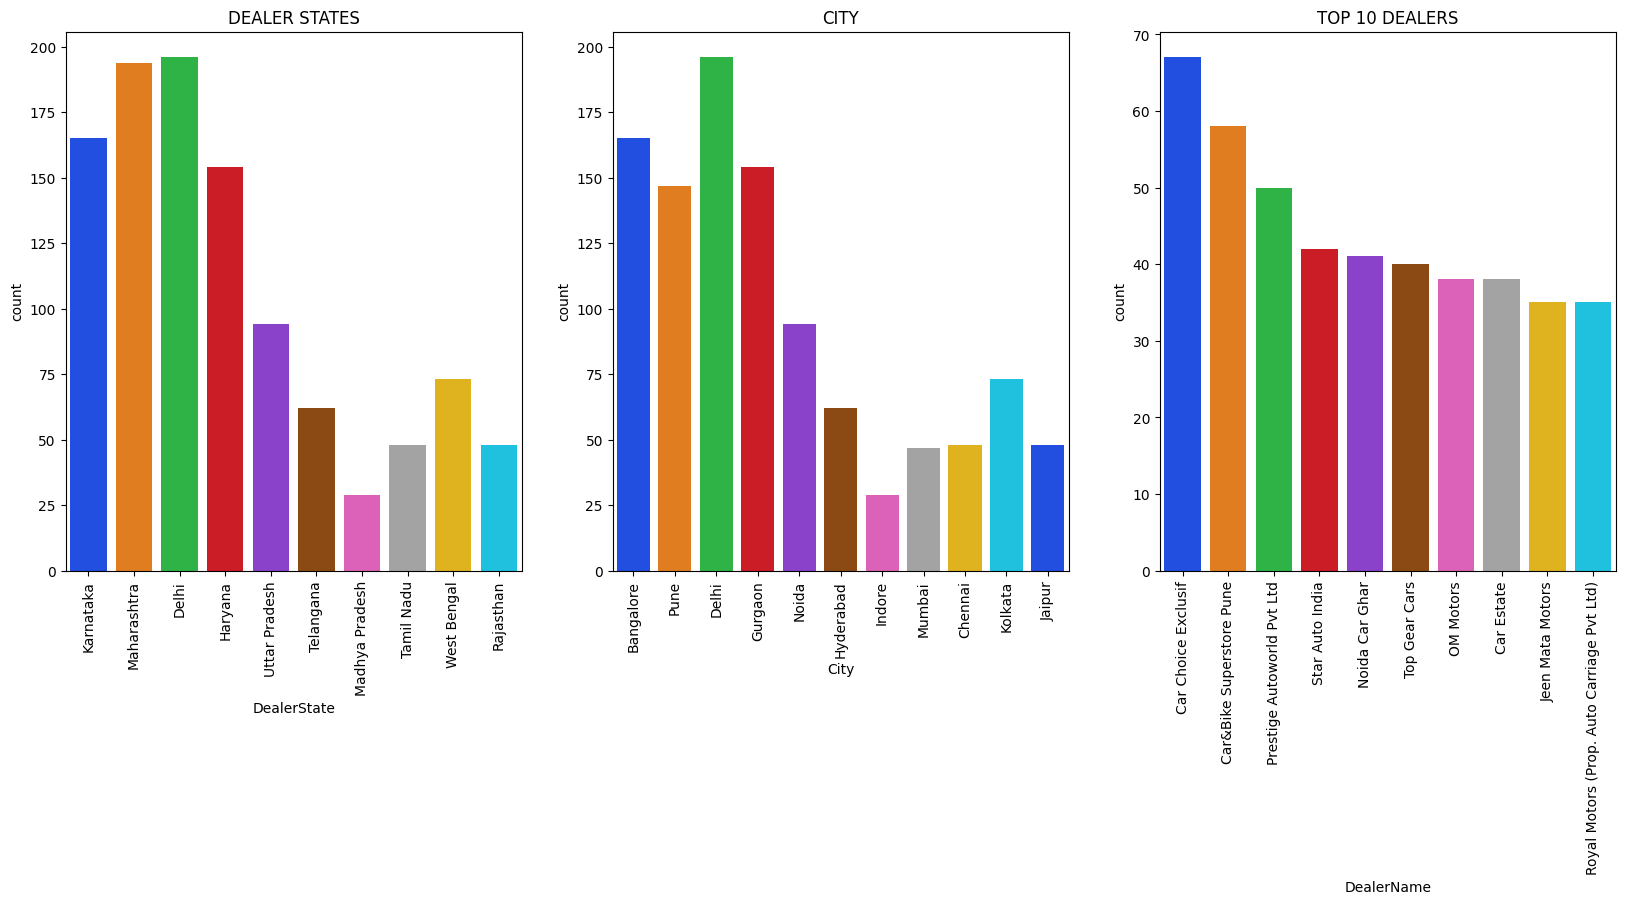

In [294]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

sns.countplot(x = 'DealerState', data = df, palette='bright' ,ax = ax[0]).set_title('DEALER STATES')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

sns.countplot(x = 'City', data = df, palette='bright', ax = ax[1]).set_title('CITY')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

sns.countplot(x = 'DealerName', data = df, palette='bright', order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2]).set_title('TOP 10 DEALERS')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

Text(0.5, 1.0, 'NUMBER OF CARS BY OWNER TYPE')

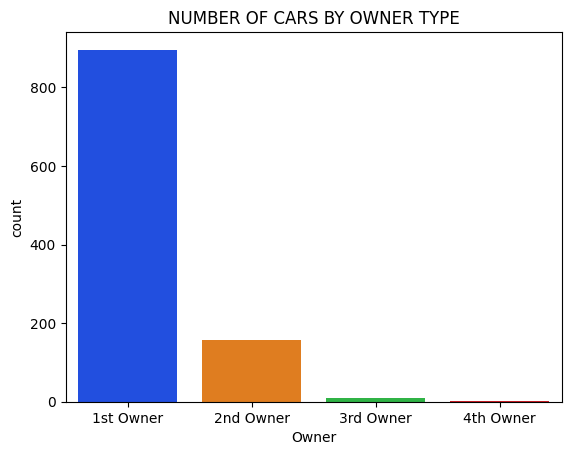

In [295]:
sns.countplot(x = 'Owner', data = df, palette='bright').set_title('NUMBER OF CARS BY OWNER TYPE')

Text(0.5, 1.0, 'NUMBER OF CARS BY WARRANTY')

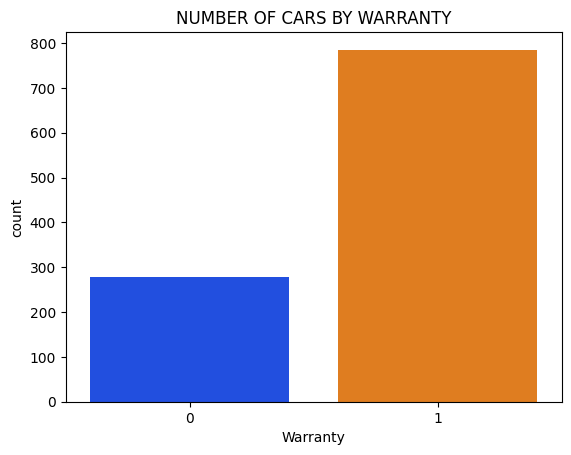

In [296]:
sns.countplot(x = 'Warranty', data = df, palette='bright').set_title('NUMBER OF CARS BY WARRANTY')

Text(0.5, 1.0, 'QUALITY SCORE DISTRIBUTION')

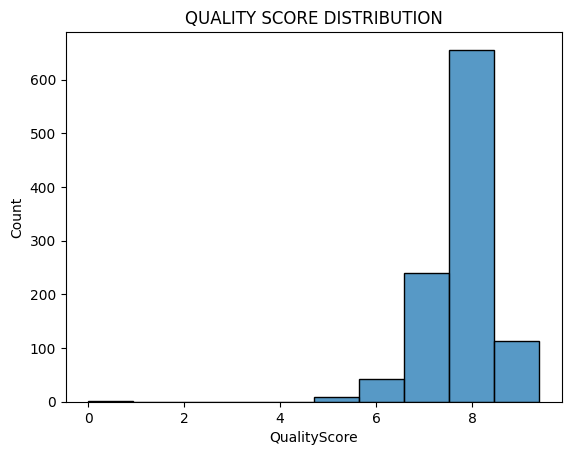

In [297]:
sns.histplot(x = 'QualityScore', data = df, bins = 10).set_title('QUALITY SCORE DISTRIBUTION')

Text(0.5, 1.0, 'TOP 10 COMPANIES BY AVERAGE PRICE')

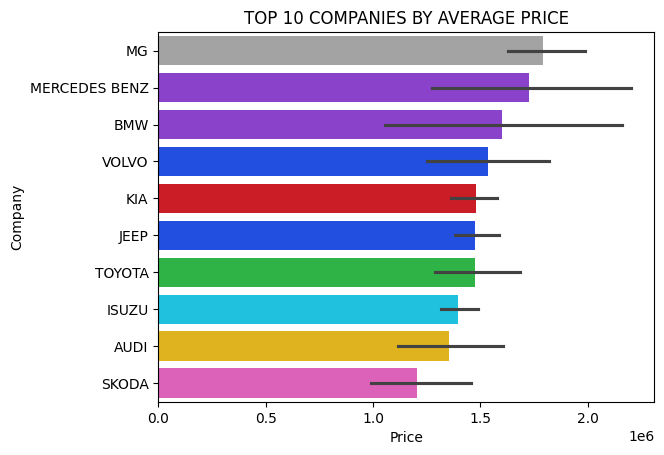

In [298]:
sns.barplot(y = 'Company', x = 'Price', data = df, order = df.groupby('Company')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Company', palette= 'bright').set_title('TOP 10 COMPANIES BY AVERAGE PRICE')

Text(0.5, 1.0, 'TOP 10 MODELS BY AVERAGE PRICE')

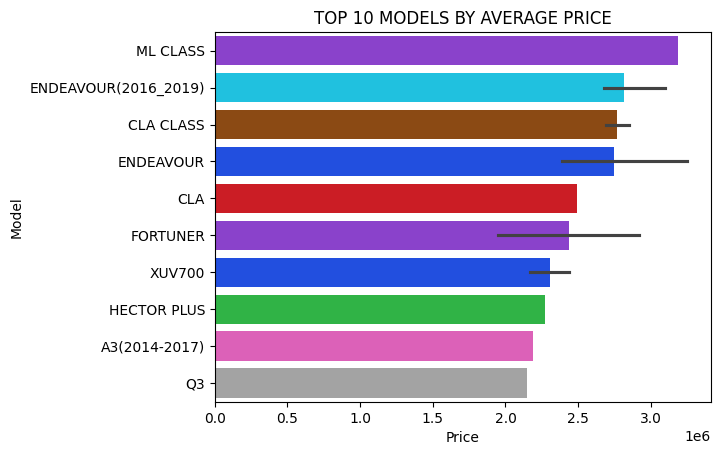

In [299]:
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:10].index, hue = 'Model', palette= 'bright').set_title('TOP 10 MODELS BY AVERAGE PRICE')

Text(0.5, 1.0, 'PRICE BY FUEL TYPE')

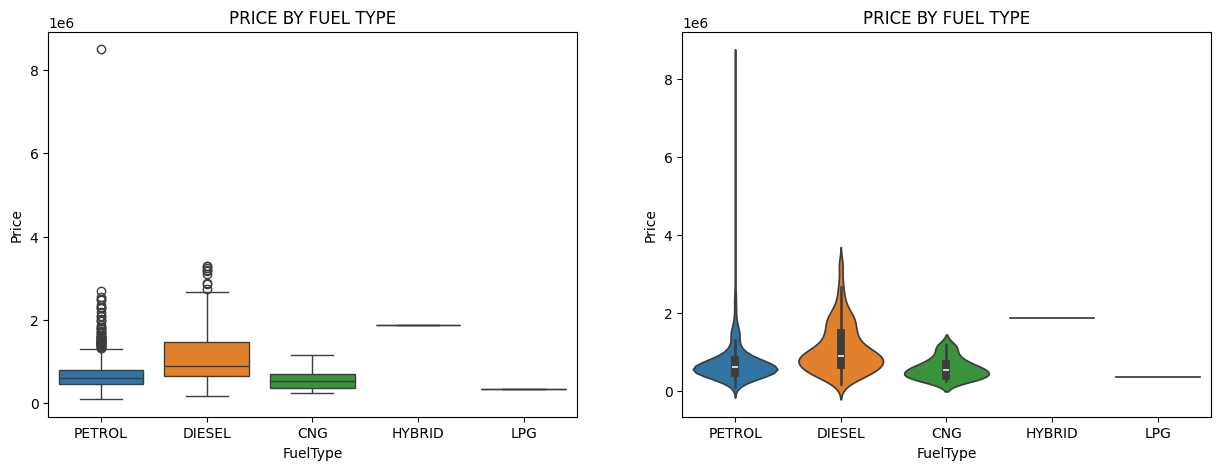

In [300]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'FuelType', y = 'Price', data = df, ax = ax[0], hue = 'FuelType').set_title('PRICE BY FUEL TYPE')
sns.violinplot(x = 'FuelType', y = 'Price', data = df, ax = ax[1], hue = 'FuelType').set_title('PRICE BY FUEL TYPE')

Text(0.5, 1.0, 'TOP 10 COLOURS BY AVERAGE PRICE')

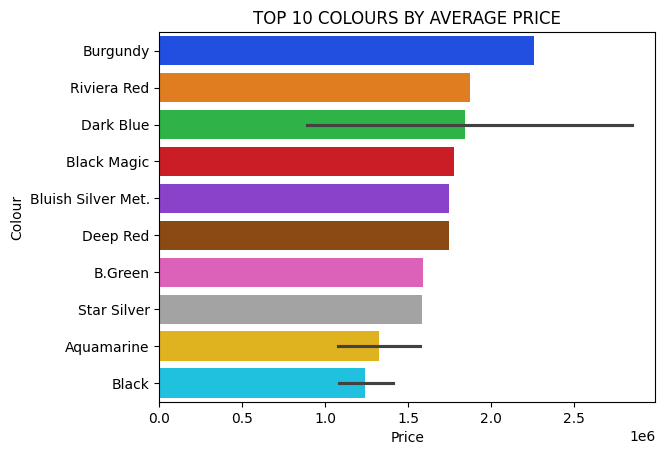

In [301]:
sns.barplot(y = 'Colour', x = 'Price', data = df, palette= 'bright', order = df.groupby('Colour')['Price'].mean().sort_values(ascending=False).iloc[:10].index).set_title('TOP 10 COLOURS BY AVERAGE PRICE')

Text(0.5, 1.0, 'ODOMETRE READING VS PRICE')

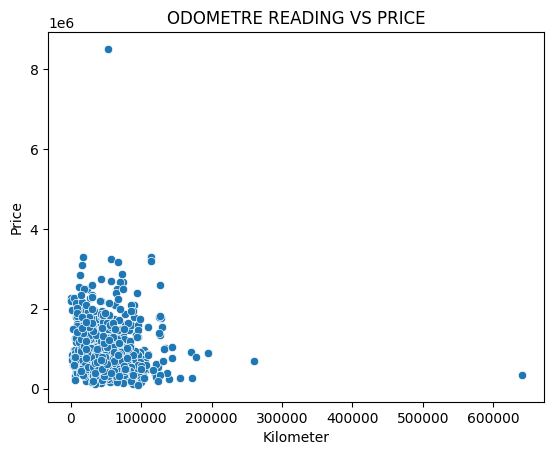

In [302]:
sns.scatterplot(x = 'Kilometer', y = 'Price', data = df).set_title('ODOMETRE READING VS PRICE')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

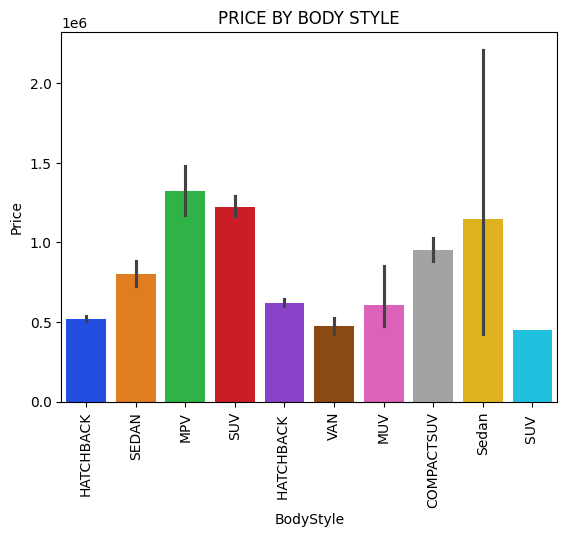

In [303]:
sns.barplot(x = 'BodyStyle', y = 'Price', data = df, hue = 'BodyStyle', palette='bright').set_title('PRICE BY BODY STYLE')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'CAR AGE VS PRICE')

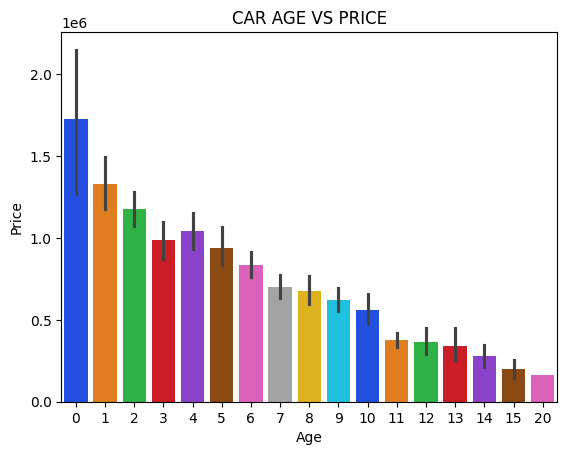

In [304]:
sns.barplot(x = 'Age', y = 'Price', data = df, palette='bright').set_title('CAR AGE VS PRICE')

[Text(0, 0, 'Car Choice Exclusif'),
 Text(1, 0, 'Car&Bike Superstore Pune'),
 Text(2, 0, 'Prestige Autoworld Pvt Ltd'),
 Text(3, 0, 'Star Auto India'),
 Text(4, 0, 'Noida Car Ghar'),
 Text(5, 0, 'Top Gear Cars'),
 Text(6, 0, 'OM Motors'),
 Text(7, 0, 'Car Estate'),
 Text(8, 0, 'Jeen Mata Motors'),
 Text(9, 0, 'Royal Motors (Prop. Auto Carriage Pvt Ltd)')]

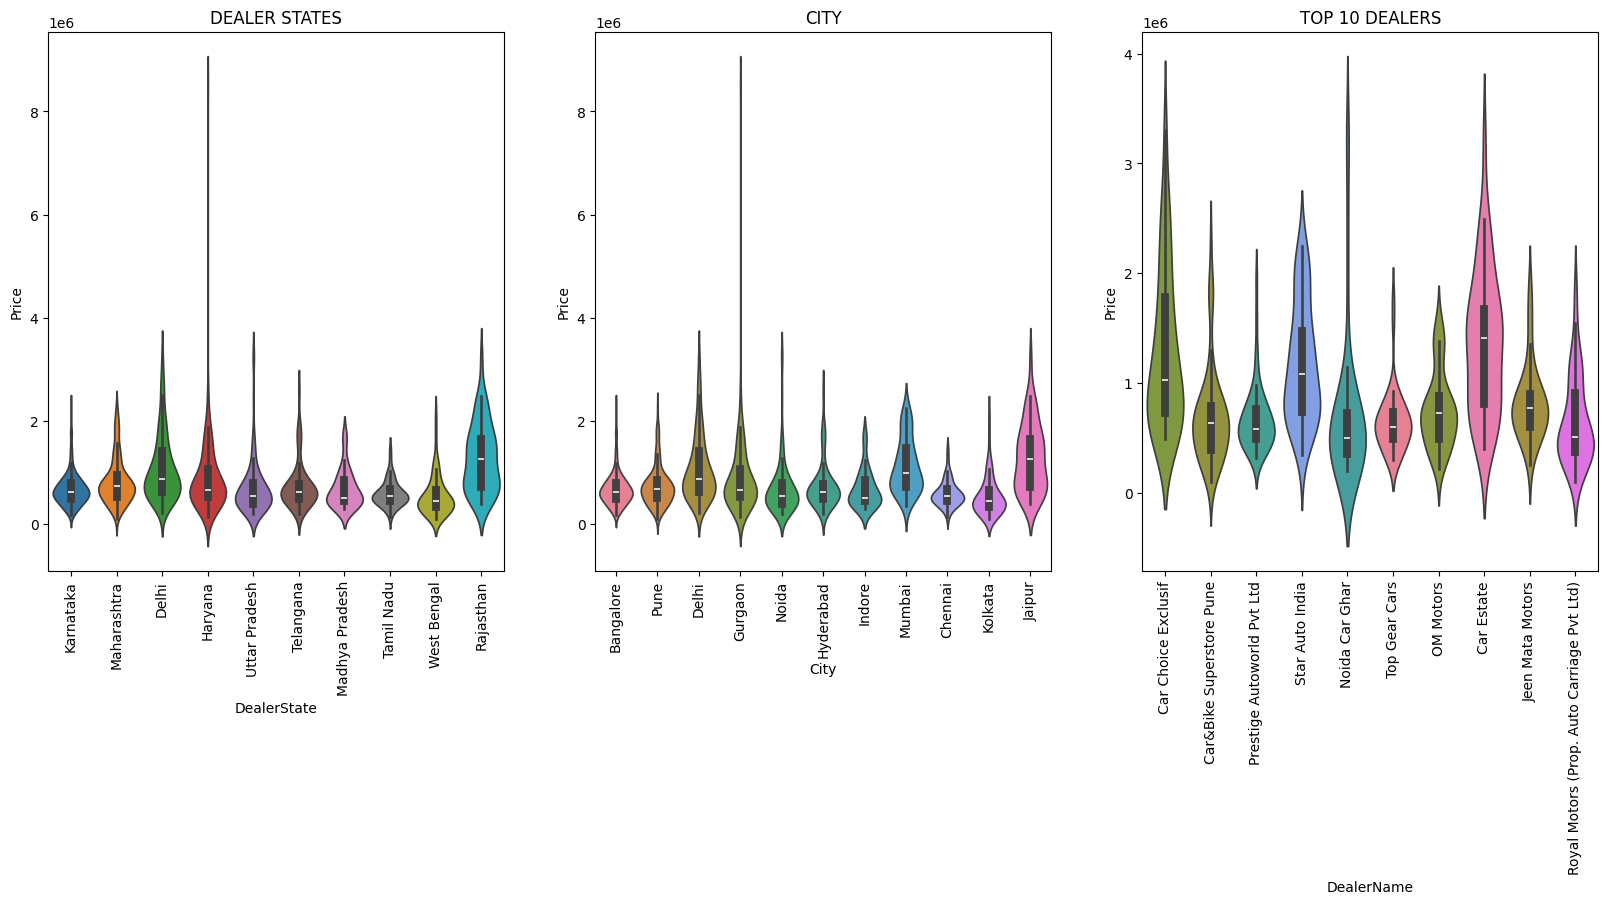

In [305]:
fig, ax = plt.subplots(1,3,figsize=(20,7))

sns.violinplot(x = 'DealerState', y = 'Price', data = df, ax = ax[0], hue = 'DealerState').set_title('DEALER STATES')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

sns.violinplot(x = 'City',y = 'Price', data = df, ax = ax[1], hue = 'City').set_title('CITY')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)

sns.violinplot(x = 'DealerName',y = 'Price', data = df, order = df['DealerName'].value_counts().iloc[:10].index, ax = ax[2], hue = 'DealerName').set_title('TOP 10 DEALERS')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 90)

Text(0.5, 1.0, 'PRICE BY OWNER TYPE')

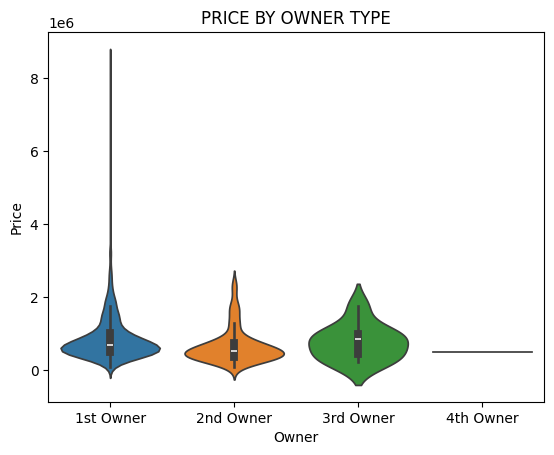

In [306]:
sns.violinplot(x = 'Owner', y = 'Price', data = df, hue = 'Owner').set_title('PRICE BY OWNER TYPE')

Text(0.5, 1.0, 'PRICE BY WARRANTY')

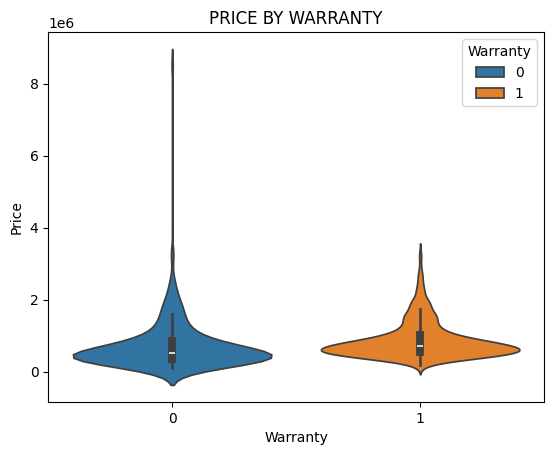

In [307]:
sns.violinplot(x = 'Warranty', y = 'Price', data = df, hue = 'Warranty').set_title('PRICE BY WARRANTY')

Text(0.5, 1.0, 'QUALITY SCORE VS PRICE')

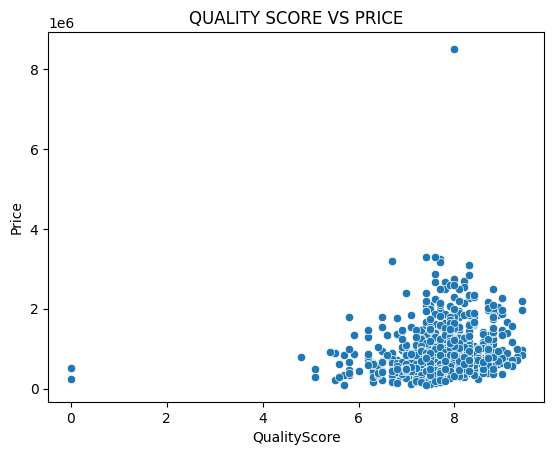

In [308]:
sns.scatterplot(x = 'QualityScore', y = 'Price', data = df).set_title('QUALITY SCORE VS PRICE')

## Again, Data Preprocessing

In [309]:
df.drop('Model', axis = 1, inplace = True)

### Label Encoding

In [310]:
cols = df.select_dtypes(include=['object']).columns
encoders = {}

for col in cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    
    joblib.dump(encoders[col], f'{col.lower()}_encoder.pkl')

In [311]:
df['Colour']

0       61
1       56
2       34
3        0
4       61
        ..
1059    71
1060    71
1061    71
1062    61
1063    68
Name: Colour, Length: 1063, dtype: int32

In [312]:
company_encoder = joblib.load('company_encoder.pkl')
fuel_type_encoder = joblib.load('fueltype_encoder.pkl')
color_encoder = joblib.load('colour_encoder.pkl')
bodystyle_encoder = joblib.load('bodystyle_encoder.pkl')
dealer_state_encoder = joblib.load('dealerstate_encoder.pkl')
city_encoder = joblib.load('city_encoder.pkl')

### Outlier Removal

In [313]:
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Correlation Matrix Heatmap

<Axes: >

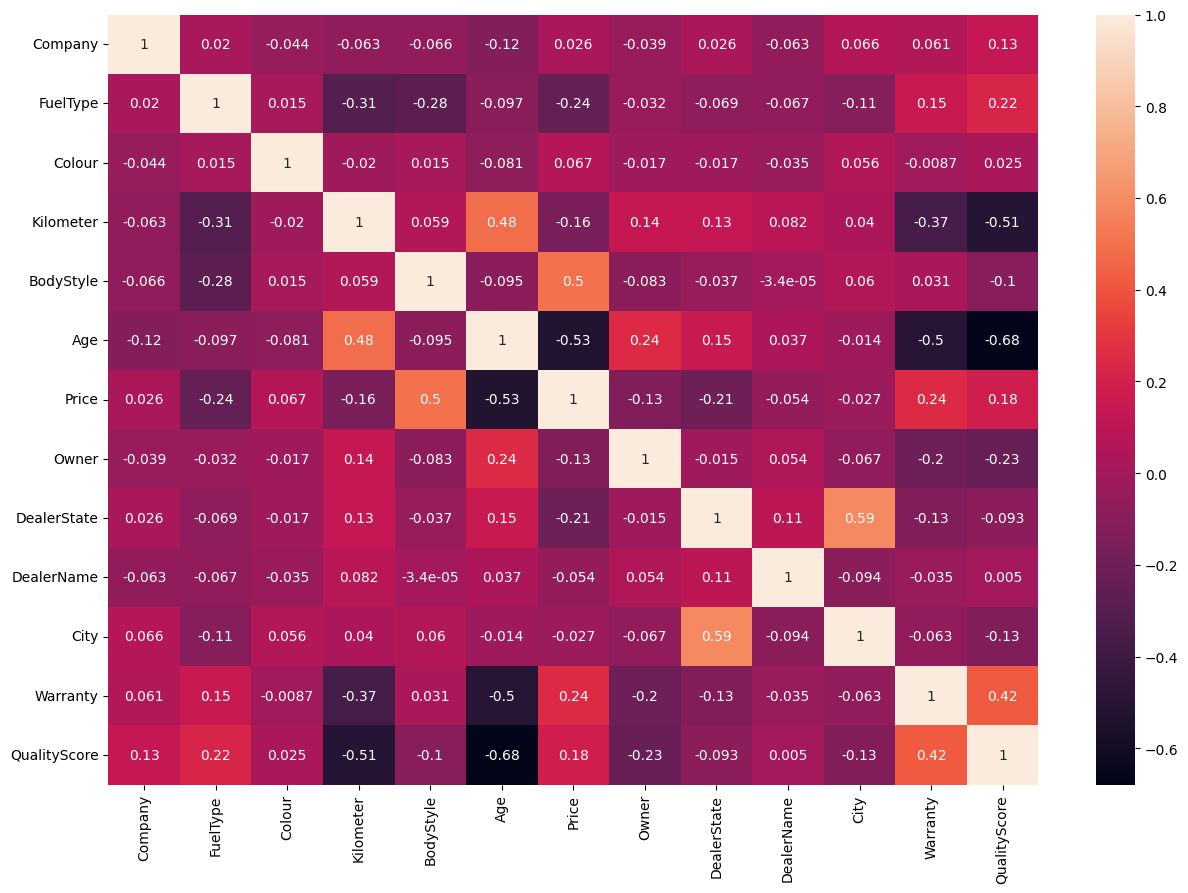

In [314]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## Model Training

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.1, random_state=42)

### GridSearchCV & Random Forest Regressor

In [316]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [317]:
rf_gscv = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, max_features='sqrt')

rf_gscv.fit(X_train, y_train)

print(rf_gscv.score(X_train, y_train))

0.9551950994368894


In [318]:
joblib.dump(rf_gscv, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [319]:
rf_gscv_pred = rf_gscv.predict(X_test)

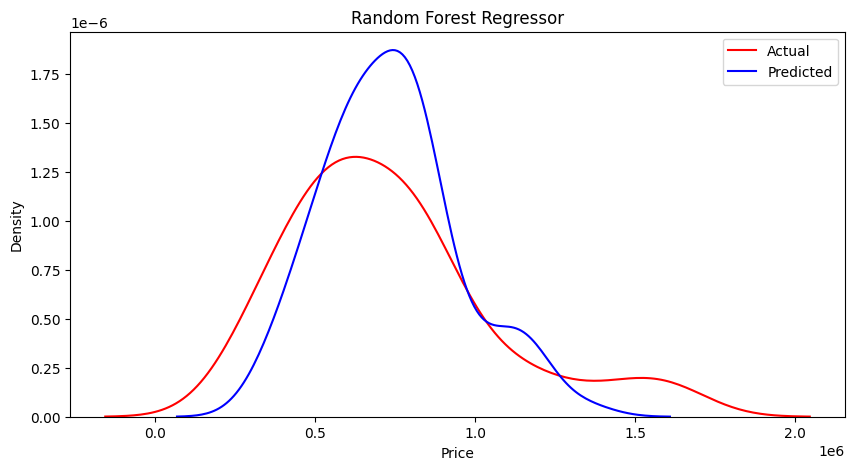

In [320]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(x=y_test, ax=ax, color='r', label='Actual')
sns.kdeplot(x=rf_gscv_pred, ax=ax, color='b', label='Predicted')

ax.set_title('Random Forest Regressor')
ax.legend()

plt.show()

In [321]:
print('Random Forest Regressor')
print('Mean Squared Error : ', mean_squared_error(y_test, rf_gscv_pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test, rf_gscv_pred))
print('R2 Score : ', r2_score(y_test, rf_gscv_pred))

Random Forest Regressor
Mean Squared Error :  40769436534.59729
Mean Absolute Error :  151542.3438603145
R2 Score :  0.6108738945824208


### Feature Importance

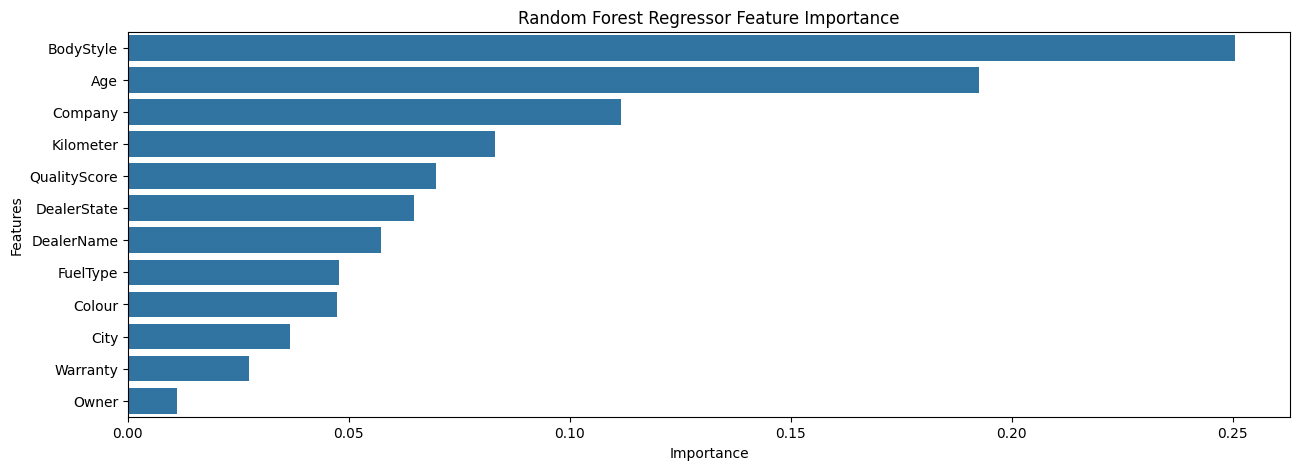

In [322]:
fig, ax = plt.subplots(figsize=(15, 5))

feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rf_gscv.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Features', data=feature_df, ax=ax).set_title('Random Forest Regressor Feature Importance')

plt.show()

## Conclusion

The used car market analysis reveals key insights: Budget cars are in high demand, while luxury cars have higher prices but lower demand. Companies like Maruti Suzuki, Hyundai, and Tata are in higher demand, while luxury brands like Mercedes and BMW are priced higher. Diesel cars are slightly more expensive than petrol ones, and popular car colors like white, grey, and black are in higher demand, with exotic colors commanding higher prices. Cars with lower odometer readings and younger age tend to be priced higher. The market is also influenced by location, car dealers, and the car's warranty and quality score. 

For price prediction, Random Forest Regressor (Fine Tuned with GridSearchCV) scored well with a score of 0.95, with key features such as car age, bodystyle, and company significantly impacting the price.